In [1]:
!pip install hazardous@git+https://github.com/soda-inria/hazardous
!pip install pycox
!pip install scikit-survival==0.23.0
!pip install scikit-learn==1.4

  Cloning https://github.com/soda-inria/hazardous to c:\users\pridanova\appdata\local\temp\7\pip-install-so1pd29a\hazardous_61ca5f28db494f3f8526bac69af73b32
  Resolved https://github.com/soda-inria/hazardous to commit 913100cdd72d9270d980a22fa55ae10c5a788ef1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: still running...
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl (11.3 MB)
  Created wheel for hazardous: filename=hazardous-0.2.0.dev0-py3-none-any.whl size=53447 sha256=4ae7240a585e82dfb8458490c9614d380094bebf8b6a3c472dba49902e8ff159
  Stored in directory: C:\Users\pridanova\AppD

  Running command git clone -q https://github.com/soda-inria/hazardous 'C:\Users\pridanova\AppData\Local\Temp\7\pip-install-so1pd29a\hazardous_61ca5f28db494f3f8526bac69af73b32'
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\survive\\Lib\\site-packages\\pandas\\conftest.py'
Consider using the `--user` option or check the permissions.



  Using cached scikit_learn-1.4.0-1-cp310-cp310-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
  Rolling back uninstall of scikit-learn
  Moving to c:\users\pridanova\appdata\roaming\python\python310\site-packages\scikit_learn-1.4.2.dist-info\
   from C:\Users\pridanova\AppData\Roaming\Python\Python310\site-packages\~cikit_learn-1.4.2.dist-info
  Moving to c:\users\pridanova\appdata\roaming\python\python310\site-packages\sklearn\
   from C:\Users\pridanova\AppData\Roaming\Python\Python310\site-packages\~klearn


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\survive\\Lib\\site-packages\\sklearn\\__init__.py'
Consider using the `--user` option or check the permissions.



In [1]:
from datetime import datetime
from functools import reduce
from hazardous import SurvivalBoost
from hazardous.metrics import integrated_brier_score_survival, integrated_brier_score_incidence
from lifelines import AalenJohansenFitter
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from pycox.evaluation import EvalSurv
from pycox.models import DeepHit
from pycox.preprocessing.label_transforms import LabTransDiscreteTime
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sksurv.ensemble import GradientBoostingSurvivalAnalysis, RandomSurvivalForest
from sksurv.metrics import check_y_survival, CensoringDistributionEstimator
from sksurv.metrics import cumulative_dynamic_auc
from sksurv.util import Surv
from types import NoneType
from typing import List
from zipfile import ZipFile
import copy
import io
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import os
import pandas as pd
import pandas as pd
import re
import seaborn as sns
import torch
import torchtuples as tt
import warnings

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
warnings.filterwarnings('ignore')

In [3]:
dtypes = {'credit_score': 'Int16', 'first_payment_date': 'str', 'first_time_homebuyer_flag': 'str',
        'maturity_date': 'str', 'MSA': 'Int32', 'MI_%': 'Int16', 'units_numb': 'Int8', 'occupancy_status': 'str',
        'CLTV': 'Int16', 'DTI_ratio': 'Int16', 'orig_UPB': 'Int64', 'LTV': 'Int16', 'orig_interest_rate': 'str',
        'channel': 'str', 'PPM_flag': 'str', 'amortization_type': 'str',
        'property_state': 'str', 'property_type': 'str', 'postal_code': 'Int32', 'id_loan': 'str',
        'loan_purpose': 'str', 'orig_loan_term': 'Int16', 'borrowers_num': 'Int8', 'seller_name': 'str',
        'service_name': 'str', 'super_conf_flag': 'str', 'id_loan_preharp': 'str',
        'program_ind': 'str', 'HARP_ind': 'str', 'property_val_method': 'Int64',
        'int_only_flag': 'str', 'MI_cancel_flag': 'str', 'orig_interest_rate':'float32'}

static = ['credit_score', 'first_time_homebuyer_flag', 'units_numb', 'MSA', 'MI_%', 'occupancy_status', 'CLTV', 'DTI_ratio', 'orig_UPB',
       'LTV', 'orig_interest_rate', 'channel', 'PPM_flag', 'amortization_type',
       'property_state', 'property_type', 'loan_purpose', 'orig_loan_term', 'borrowers_num', 'super_conf_flag',
       'int_only_flag', 'property_val_method']

categ = ['occupancy_status', 'first_time_homebuyer_flag', 'channel', 'PPM_flag', 'amortization_type',
       'property_state', 'borrowers_num', 'int_only_flag', 'property_val_method', 'modification_flag', 'step_mod_flag', 'deferred_payment_plan',
         'ELTV', 'delinq_due_disaster', 'borrowe_asistance_stat_code', 'property_type', 'loan_purpose', 'super_conf_flag']

def get_y(cens, time):
    cens, time = np.array(cens), np.array(time)
    y = np.empty(dtype=[('event', int), ('duration', np.float64)], shape=cens.shape[0])
    y['event'] = cens
    y['duration'] = time
    return y


def transform_timegrid(curves, time, grid):
    if time.max() < grid.max():
        time = np.hstack([time, np.array([grid.max()+1])])
        if len(curves.shape)==1:
            curves = np.hstack([curves, np.array([0])])
        elif len(curves.shape)==2:
            curves = np.hstack([curves, np.zeros(shape=(curves.shape[0], 1))])
    ind = np.searchsorted(time, grid)
    if len(curves.shape)==1:
      return curves[ind]
    elif len(curves.shape)==2:
      return curves[:, ind]
    else:
      return None


def transform_curves(curves): # noninc
  """
    - curves - current survvial_function(s)
    -------
    Returns:
    - array of nonincreasing survival function(s)
  """
  if len(curves.shape) == 1: curves = curves[None, :]
  return np.array(list(map(lambda tmp:
                           reduce(lambda c, x: (c[0], c[1]+[c[0]])
                           if x > c[0] else (x, c[1]+[x]),
                           tmp[1:], (tmp[0], [tmp[0]]))[1],
                       curves)))

def transform_events(y):
  events = sorted(y.event.unique())
  d = {events[i]:i for i in range(len(events))}
  return y.replace({"event": d}), d


def str_to_categ(df_col):
    uniq = df_col.unique()
    return df_col.map(dict(zip(uniq, range(len(uniq)))))


class Scaler():
    def __init__(self):
        self.constant_cols=['int_only_flag', 'property_val_method', 'super_conf_flag', 'amortization_type']
        self.categs = list((set(static) & set(categ) - set(self.constant_cols)))
        self.enc = ColumnTransformer(transformers=[('ohe', OneHotEncoder(sparse_output=False).set_output(transform="pandas"), self.categs)], remainder='passthrough')
   
    def fit(self, list_of_df):
        X = pd.concat(list_of_df, axis=0)
        X.drop(self.constant_cols, inplace=True, axis=1)
        self.enc.fit(X)
    
    def transform(self, X):
        X.MSA.fillna(X.MSA.median(), inplace=True)
        X.drop(self.constant_cols, inplace=True, axis=1)
        X = self.enc.transform(X)  
        scaler = StandardScaler().set_output(transform="pandas")
        X = scaler.fit_transform(X)
        return X



def bal21_sample():
    file = r"D:\SurvivalAnalysis\CompetingRisk\files\result_short.csv"
    df = pd.read_csv(file, dtype=dtypes)
    df['event'] = df.zero_balance_code.astype('int')*(df.cens.astype('int'))
    df = df[static+['time', 'event']]
    df = df.apply(lambda x: str_to_categ(x) if x.name in categ else x, axis=0)
    sign = sorted(list(set(df.columns) - {'time', 'event'}))
    y = get_y(df['event'], df['time'] + 1)
    X = df.loc[:, sign]
    return y, X, sign, categ, df

def rand21_sample():
    file = r"D:\SurvivalAnalysis\CompetingRisk\files\random_sample3.csv"
    df = pd.read_csv(file, dtype=dtypes)
    df['event'] = df.zero_balance_code.astype('int')*(df.cens.astype('int'))
    df = df[static+['time', 'event']]
    df = df.apply(lambda x: str_to_categ(x) if x.name in categ else x, axis=0)
    sign = sorted(list(set(df.columns) - {'time', 'event'}))
    y = get_y(df['event'], df['time'] + 1)
    X = df.loc[:, sign]
    return y, X, sign, categ, df

def bal280_sample():
    file = r"D:\SurvivalAnalysis\CompetingRisk\files\result_280bal.csv"
    df = pd.read_csv(file, dtype=dtypes)
    df['event_true'] = df.zero_balance_code.astype('int')*(df.cens.astype('int'))
    df['event'] = df.cens.astype('int')
    df = df[static+['time', 'event', 'event_true']]
    df = df.apply(lambda x: str_to_categ(x) if x.name in categ else x, axis=0)
    sign = sorted(list(set(df.columns) - {'time', 'event'}))
    y = get_y(df['event'], df['time'] + 1)
    y_true = get_y(df['event_true'], df['time'] + 1)
    X = df.loc[:, sign]
    return y, y_true, X, df

In [106]:
y, y_true, X_true, df = bal280_sample()

In [107]:
y = pd.DataFrame(y)
y_true_all = pd.DataFrame(y_true)
y_true = pd.DataFrame(y_true)

<Axes: xlabel='duration', ylabel='Density'>

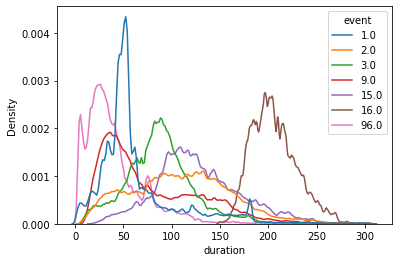

In [40]:
sns.kdeplot(data=y_true[y_true!=0], x="duration", hue="event", bw_adjust=0.25, palette="tab10")

In [150]:
sort_events = {96: 1, 9:2, 1:3, 3:4, 2:5, 15:6, 16:7}

<Axes: xlabel='duration', ylabel='Density'>

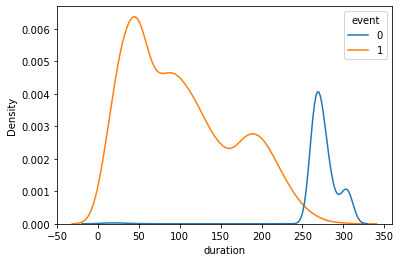

In [30]:
sns.kdeplot(data=y, x="duration", hue="event", bw_adjust=2, palette="tab10")

Обучаем модели на y.duration, потому что интересует распределение времени (если обучать на всем X, то строится смесь совместных распределений, а нас интересует разделение по t). Ниже пример, что получается:

<Axes: xlabel='duration', ylabel='Density'>

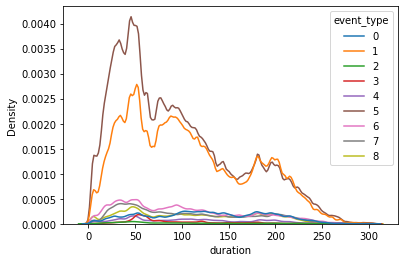

In [37]:
gmm = GaussianMixture(random_state=42, covariance_type='spherical', n_components=9)
gmm.fit(X[y.event!=0])
cluster_labels = gmm.predict(X[y.event!=0])

y['event_type'] = 0
y['event_type'][y.event!=0] = cluster_labels
sns.kdeplot(data=y[y.event!=0], x="duration", hue="event_type", bw_adjust=0.25, palette="tab10")

<Axes: xlabel='duration', ylabel='Density'>

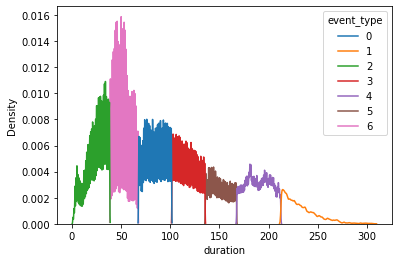

In [46]:
gmm = GaussianMixture(random_state=42, covariance_type='spherical', n_components=7)
gmm.fit(pd.DataFrame(y[y.event!=0]['duration']))
labels = gmm.predict(pd.DataFrame(y[y.event!=0]['duration']))

y['event_type'] = 0
y['event_type'][y.event!=0] = labels
sns.kdeplot(data=y[y.event!=0], x="duration", hue="event_type", bw_adjust=0.25, palette="tab10", ax=ax.flatten()[i])

# Модели

### GMM

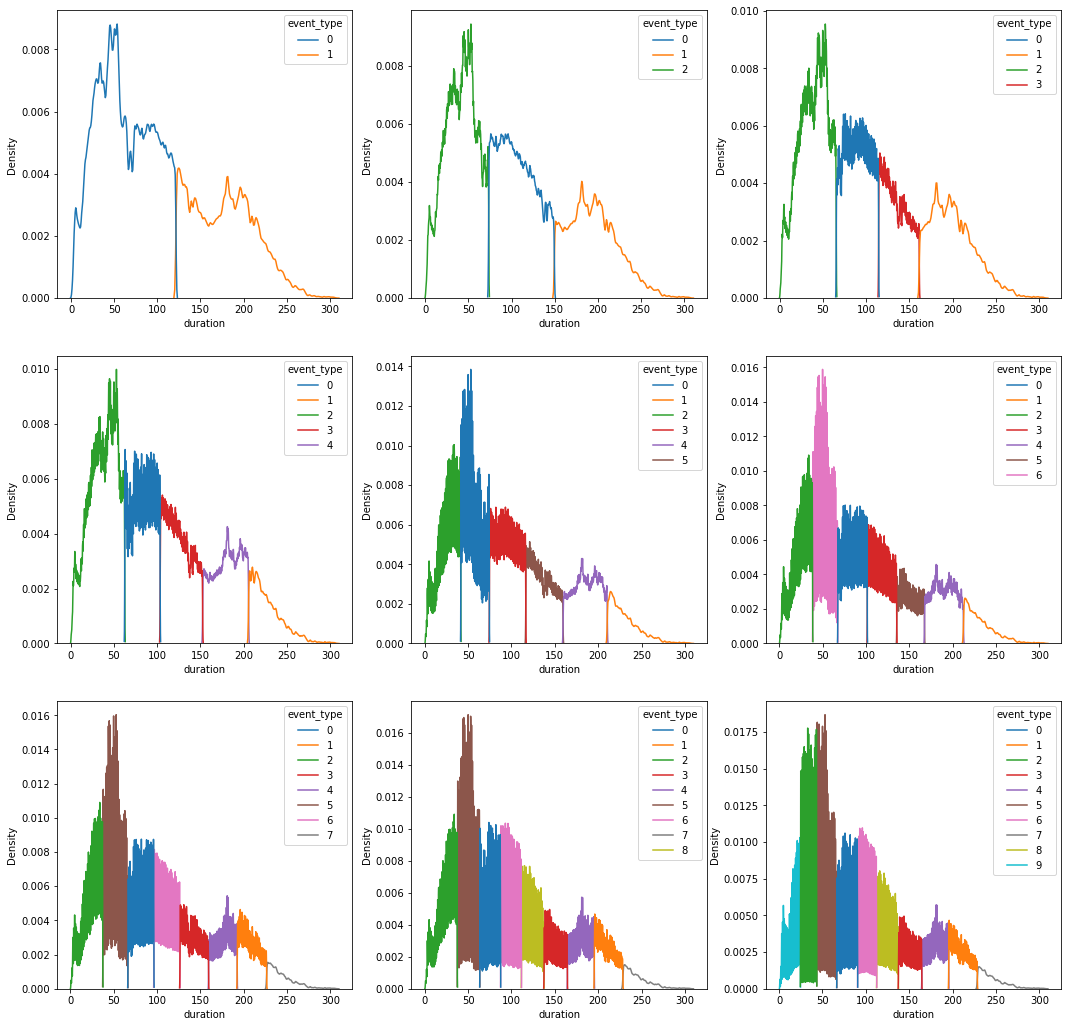

In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

n_components_range = range(2, 11) 
times = pd.DataFrame(y[y.event!=0]['duration'])
fig, ax = plt.subplots(3, 3, figsize=(18, 18))

db_scores = [] 
kh_scores = [] 
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(times)
    
    labels = gmm.predict(times)

    y['event_type'] = 0
    y['event_type'][y.event!=0] = labels
    sns.kdeplot(data=y[y.event!=0], x="duration", hue="event_type", bw_adjust=0.25, palette="tab10", ax=ax.flatten()[n_components-2])
    db_score = davies_bouldin_score(times, labels)
    kh_score = calinski_harabasz_score(times, labels)    
    db_scores.append(db_score)
    kh_scores.append(kh_score)
    
plt.show()

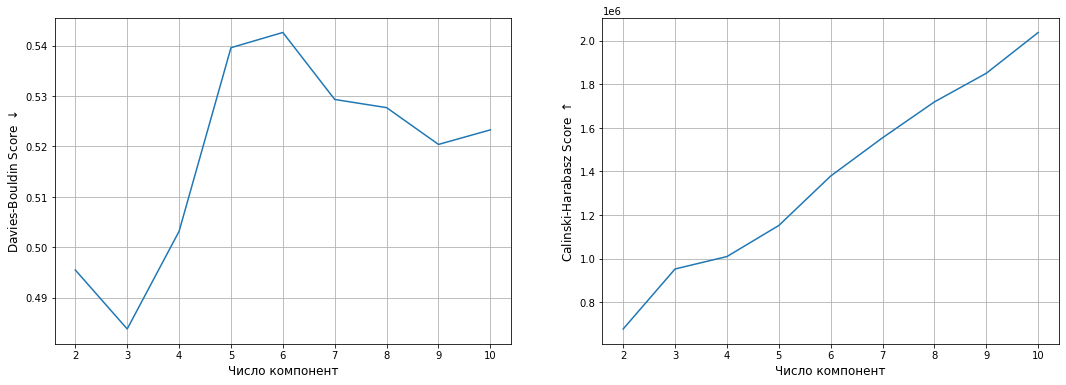

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(n_components_range, db_scores)
ax1.set_ylabel(r'Davies-Bouldin Score $\downarrow$', fontsize=12)
ax1.set_xlabel('Число компонент', fontsize=12)
ax1.grid(True)
ax1.set_xticks(n_components_range)

ax2.plot(n_components_range, kh_scores)
ax2.set_ylabel(r'Calinski-Harabasz Score $\uparrow$', fontsize=12)
ax2.set_xlabel('Число компонент', fontsize=12)
ax2.grid(True)
ax2.set_xticks(n_components_range)

plt.show()

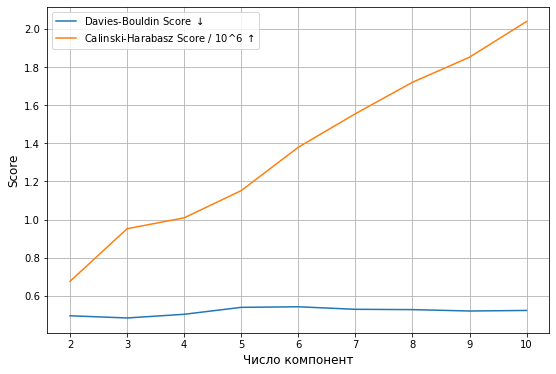

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

l1, = ax.plot(n_components_range, db_scores, label=r'Davies-Bouldin Score $\downarrow$')
l2, = ax.plot(n_components_range, np.array(kh_scores)/(10**6), label=r'Calinski-Harabasz Score / 10^6 $\uparrow$')
ax.set_ylabel(r'Score', fontsize=12)
ax.set_xlabel('Число компонент', fontsize=12)
ax.grid(True)
ax.set_xticks(n_components_range)
ax.legend(handles=[l1, l2])

plt.show()

из графиков получается, что лучше всего, если число компонент = 3. (хотя индекс калинского-харабаша неограниченно растет, он склонен поощрять неограниченное деление. Как видно, после 3 скорость роста снижается, так что можно считать, что это лучшее значение). 

Можно заметить, что в исходном разбиении события 1, 9, 96 имеют похожее распределение, можно попробовать их объдинить и посмотреть что будет

<Axes: xlabel='duration', ylabel='Density'>

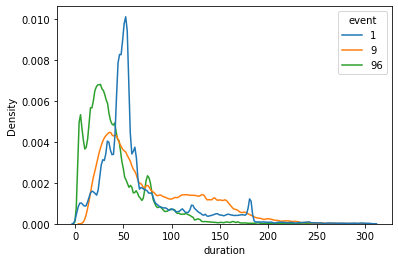

In [167]:
sns.kdeplot(data=y_true_all[y_true_all.event.isin([9, 1, 96])], x="duration", hue="event", bw_adjust=0.25, palette="tab10")

И аналогично 2,3, 15 (не совсем одинаковое, но похожее)

<Axes: xlabel='duration', ylabel='Density'>

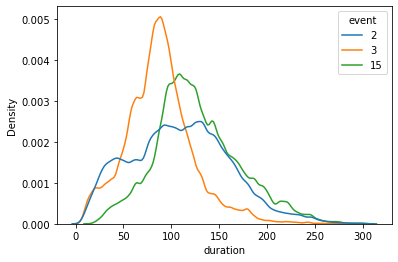

In [104]:
sns.kdeplot(data=y_true[y_true.event.isin([2, 3, 15])], x="duration", hue="event", bw_adjust=0.5, palette="tab10")

Посмотрим, как будет выглядеть график с объединенными событиями (и сравним с разбиением GMM)

In [108]:
y_true.loc[y_true['event'].isin([1, 96, 9]), 'event'] = 1
y_true.loc[y_true['event'].isin([2, 3, 15]), 'event'] = 2
y_true.loc[y_true['event'].isin([16]), 'event'] = 3

In [109]:
y = y.sort_values(by='duration')
times = pd.DataFrame(y[y.event!=0]['duration'])

Text(0.5, 1.0, 'Исходное разделение с объединением событий')

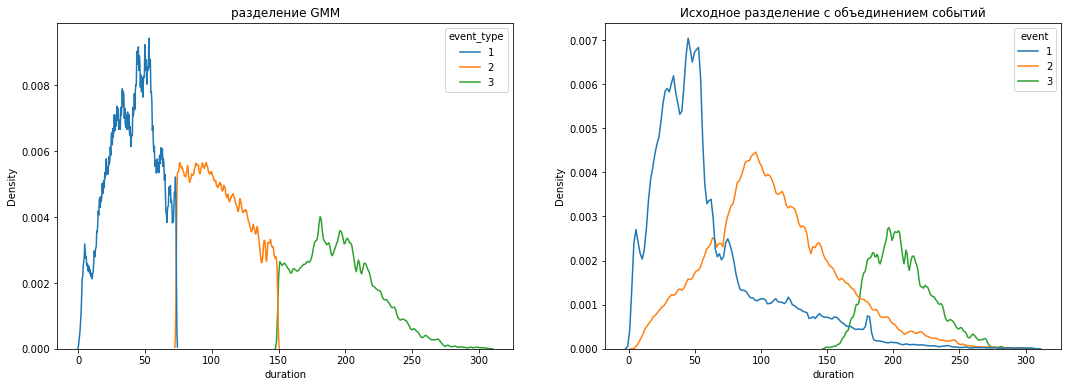

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

y = y.sort_values(by='duration')
times = pd.DataFrame(y[y.event!=0]['duration'])
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(times)
labels = gmm.predict(times)

sorted_indices = np.argsort(gmm.means_.flatten())
label_mapping = np.zeros_like(sorted_indices)
label_mapping[sorted_indices] = np.arange(gmm.n_components)

labels = np.array([label_mapping[label] for label in labels])
y['event_type'] = 0
y['event_type'][y.event!=0] = labels+1

sns.kdeplot(data=y[y.event!=0], x="duration", hue="event_type", bw_adjust=0.25, palette="tab10", ax=ax1)
ax1.set_title('разделение GMM')
sns.kdeplot(data=y_true[y_true.event!=0], x="duration", hue="event", bw_adjust=0.25, palette="tab10", ax=ax2)
ax2.set_title('Исходное разделение с объединением событий')

Посчитаем качество разделения (сравним с исходными метками, и с исходными измененными) - прежде переназначим события исходных данных и разделения GMM в порядке возрастания времени до наступления события, чтобы метки у одинаковых мод совпадали

In [132]:
from sklearn.metrics import f1_score, balanced_accuracy_score, classification_report, confusion_matrix

mask = y.event>0
print(f"f1 macro: {f1_score(y_true[mask]['event'], y[mask]['event_type'], average='macro')}")
print("balanced accuracy:", balanced_accuracy_score(y_true[mask]['event'], y[mask]['event_type']))

m = confusion_matrix(y_true[mask]['event'], y[mask]['event_type'])
print(m)

f1 macro: 0.4332411659031215
balanced accuracy: 0.4829682539682539
[[35000 35000 35000]
 [65394 39606     0]
 [    0  9157 25843]]


если смотреть на значения меток, то первый класс он не различает (почему?? - на графике исходных мода 1-го события хоть и растягивается дальше, но пик совпадает с разделением GMM, то есть верно предсказанных должно быть больше). А метки второго события больше относит к первому

посмотрим на Adjusted Rand Index и Normalized Mutual Information

In [154]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

mask = y.event>0
ari_score = adjusted_rand_score(y_true[mask]['event'], y[mask]['event_type'])
nmi_score = normalized_mutual_info_score(y_true[mask]['event'], y[mask]['event_type'])

print(f"Adjusted Rand Index: {ari_score}")
print("Normalized Mutual Information:", nmi_score)

Adjusted Rand Index: 0.15799399927825022
Normalized Mutual Information: 0.23191135266104848


тогда все плохо

если сравнивать с исходными значениями events:

In [11]:
mask = y.event>0
ari_score = adjusted_rand_score(y_true_all[mask]['event'], y[mask]['event_type'])
nmi_score = normalized_mutual_info_score(y_true_all[mask]['event'], y[mask]['event_type'])

print(f"Adjusted Rand Index: {ari_score}")
print("Normalized Mutual Information:", nmi_score)

Adjusted Rand Index: 0.41405225350285957
Normalized Mutual Information: 0.6220873524908302


а эти метрики выглядят лучше (todo посмотреть почему), значит предсказанная структура (из 3 компонентов) похожа на исходную, но хуже соотносится с группировкой событий

In [133]:
gmm.weights_

array([0.33880924, 0.25265642, 0.40853434])

### Variational Bayesian Gaussian Mixture (VBGM)

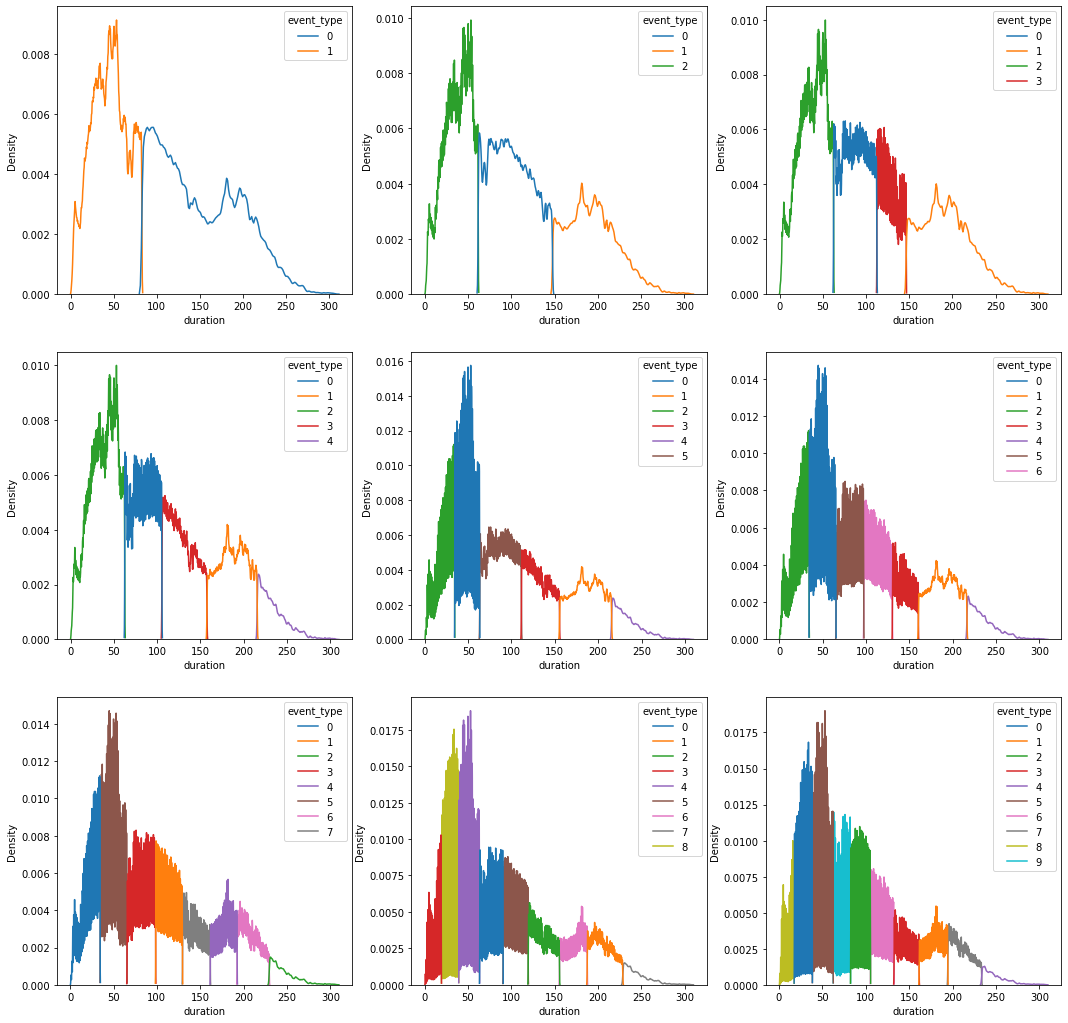

In [14]:
from sklearn.mixture import BayesianGaussianMixture

n_components_range = range(2, 11) 
times = pd.DataFrame(y[y.event!=0]['duration'])
fig, ax = plt.subplots(3, 3, figsize=(18, 18))

db_scores = [] 
kh_scores = [] 
ari_3 = []
nmi_3=[]
ari_7=[]
nmi_7=[]
for n_components in n_components_range:
    vbgm = BayesianGaussianMixture(
    n_components=n_components, 
    random_state=42,
    n_init=3)

    vbgm.fit(times)
    labels = vbgm.predict(times)

    y['event_type'] = 0
    y['event_type'][y.event!=0] = labels
    sns.kdeplot(data=y[y.event!=0], x="duration", hue="event_type", bw_adjust=0.25, palette="tab10", ax=ax.flatten()[n_components-2])
    db_score = davies_bouldin_score(times, labels)
    kh_score = calinski_harabasz_score(times, labels)  
    ari_score_3 = adjusted_rand_score(y_true[mask]['event'], y[mask]['event_type'])
    nmi_score_3 = normalized_mutual_info_score(y_true[mask]['event'], y[mask]['event_type'])
    ari_score_7 = adjusted_rand_score(y_true_all[mask]['event'], y[mask]['event_type'])
    nmi_score_7 = normalized_mutual_info_score(y_true_all[mask]['event'], y[mask]['event_type'])

    db_scores.append(db_score)
    kh_scores.append(kh_score)
    ari_3.append(ari_score_3)
    nmi_3.append(nmi_score_3)
    ari_7.append(ari_score_7)
    nmi_7.append(nmi_score_7)
    
plt.show()

модель всегда выбирает максимальное число компонент вне зависимости от weight_concentration_prior, наверное из-за того, что распределение слишком "сложное"

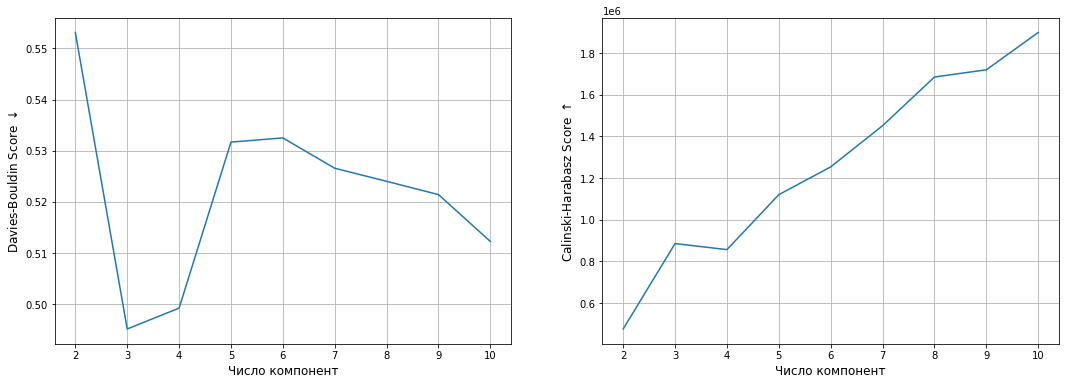

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(n_components_range, db_scores)
ax1.set_ylabel(r'Davies-Bouldin Score $\downarrow$', fontsize=12)
ax1.set_xlabel('Число компонент', fontsize=12)
ax1.grid(True)
ax1.set_xticks(n_components_range)

ax2.plot(n_components_range, kh_scores)
ax2.set_ylabel(r'Calinski-Harabasz Score $\uparrow$', fontsize=12)
ax2.set_xlabel('Число компонент', fontsize=12)
ax2.grid(True)
ax2.set_xticks(n_components_range)

plt.show()

тут оптимальное тоже 3, посчитаем метрики

In [29]:
vbgm = BayesianGaussianMixture(n_components=3, random_state=42, n_init=3)
vbgm.fit(times)
labels = vbgm.predict(times)

sorted_indices = np.argsort(gmm.means_.flatten())
label_mapping = np.zeros_like(sorted_indices)
label_mapping[sorted_indices] = np.arange(gmm.n_components)

labels = np.array([label_mapping[label] for label in labels])
y['event_type'] = 0
y['event_type'][y.event!=0] = labels+1

In [30]:
from sklearn.metrics import f1_score, balanced_accuracy_score, classification_report, confusion_matrix

mask = y.event>0
print(f"f1 macro: {f1_score(y_true[mask]['event'], y[mask]['event_type'], average='macro')}")
print("balanced accuracy:", balanced_accuracy_score(y_true[mask]['event'], y[mask]['event_type']))

m = confusion_matrix(y_true[mask]['event'], y[mask]['event_type'])
print(m)

f1 macro: 0.48663276255317545
balanced accuracy: 0.5410761904761905
[[35000 35000 35000]
 [51152 53848     0]
 [    0  7803 27197]]


метрики кластеризации (сравнение с исходными метками)

In [31]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

mask = y.event>0
ari_score = adjusted_rand_score(y_true[mask]['event'], y[mask]['event_type'])
nmi_score = normalized_mutual_info_score(y_true[mask]['event'], y[mask]['event_type'])

print(f"Adjusted Rand Index: {ari_score}")
print("Normalized Mutual Information:", nmi_score)

Adjusted Rand Index: 0.14272070782902302
Normalized Mutual Information: 0.22900385643737128


In [32]:
mask = y.event>0
ari_score = adjusted_rand_score(y_true_all[mask]['event'], y[mask]['event_type'])
nmi_score = normalized_mutual_info_score(y_true_all[mask]['event'], y[mask]['event_type'])

print(f"Adjusted Rand Index: {ari_score}")
print("Normalized Mutual Information:", nmi_score)

Adjusted Rand Index: 0.39414408916117194
Normalized Mutual Information: 0.5997182350760137


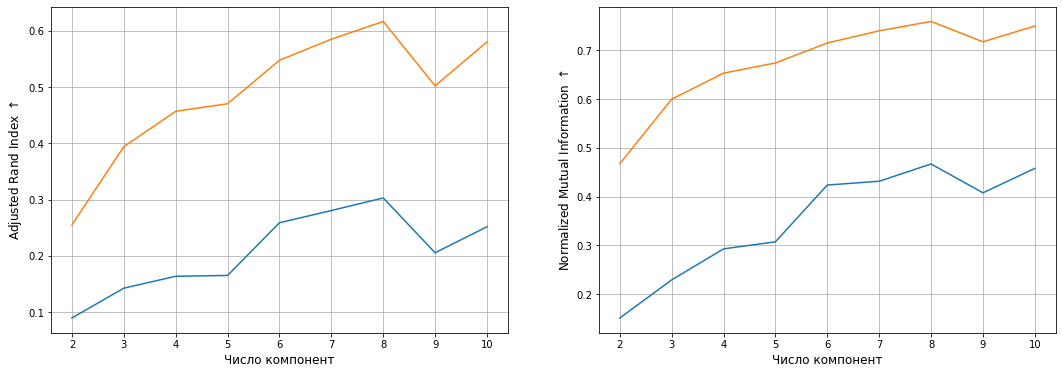

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(n_components_range, ari_3)
ax1.plot(n_components_range, ari_7)
ax1.set_ylabel(r'Adjusted Rand Index $\uparrow$', fontsize=12)
ax1.set_xlabel('Число компонент', fontsize=12)
ax1.grid(True)
ax1.set_xticks(n_components_range)

ax2.plot(n_components_range, nmi_3)
ax2.plot(n_components_range, nmi_7)
ax2.set_ylabel(r'Normalized Mutual Information $\uparrow$', fontsize=12)
ax2.set_xlabel('Число компонент', fontsize=12)
ax2.grid(True)
ax2.set_xticks(n_components_range)

plt.show()

## KDE

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks

In [60]:
time_grid = np.linspace(times.min(), times.max(), 100).reshape(-1, 1)

peaks = []
ranges = []
densities = []
for bw in [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 2, 4, 6]:
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(times)
    density = np.exp(kde.score_samples(time_grid))
    peak, properties = find_peaks(density, prominence=0.001)
    peaks.append(peak)
    ranges.append(properties['left_bases'])
    densities.append(density)

In [61]:
results = pd.DataFrame(np.array(densities).T, columns=[0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 2, 4, 6])

<Axes: >

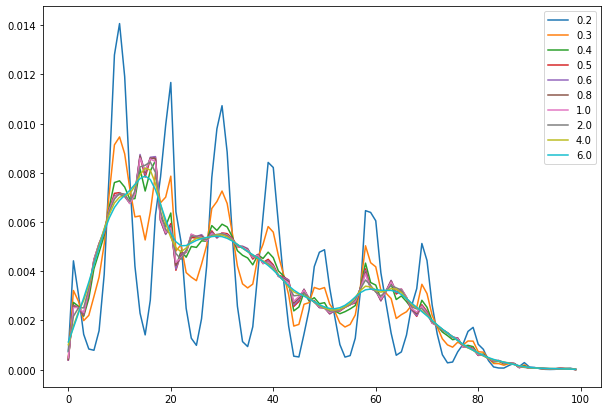

In [66]:
results.plot(figsize=(10, 7))

посмотрим как изменяется число мод в зависимости от bw

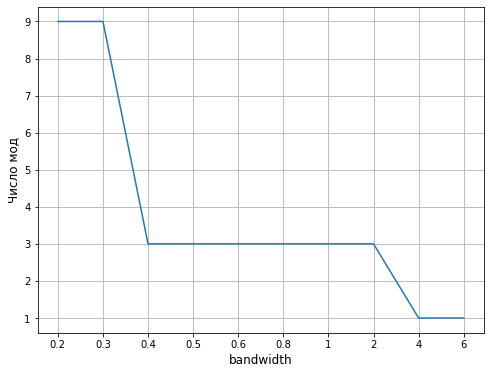

In [71]:
num_peaks = list(map(len, peaks))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
bws = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 2, 4, 6]
ax.plot(range(len(bws)), num_peaks)
ax.set_ylabel(r'Число мод', fontsize=12)
ax.set_xlabel('bandwidth', fontsize=12)
ax.grid(True)
ax.set_xticks(range(len(bws)), labels=bws)
plt.show()

In [76]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


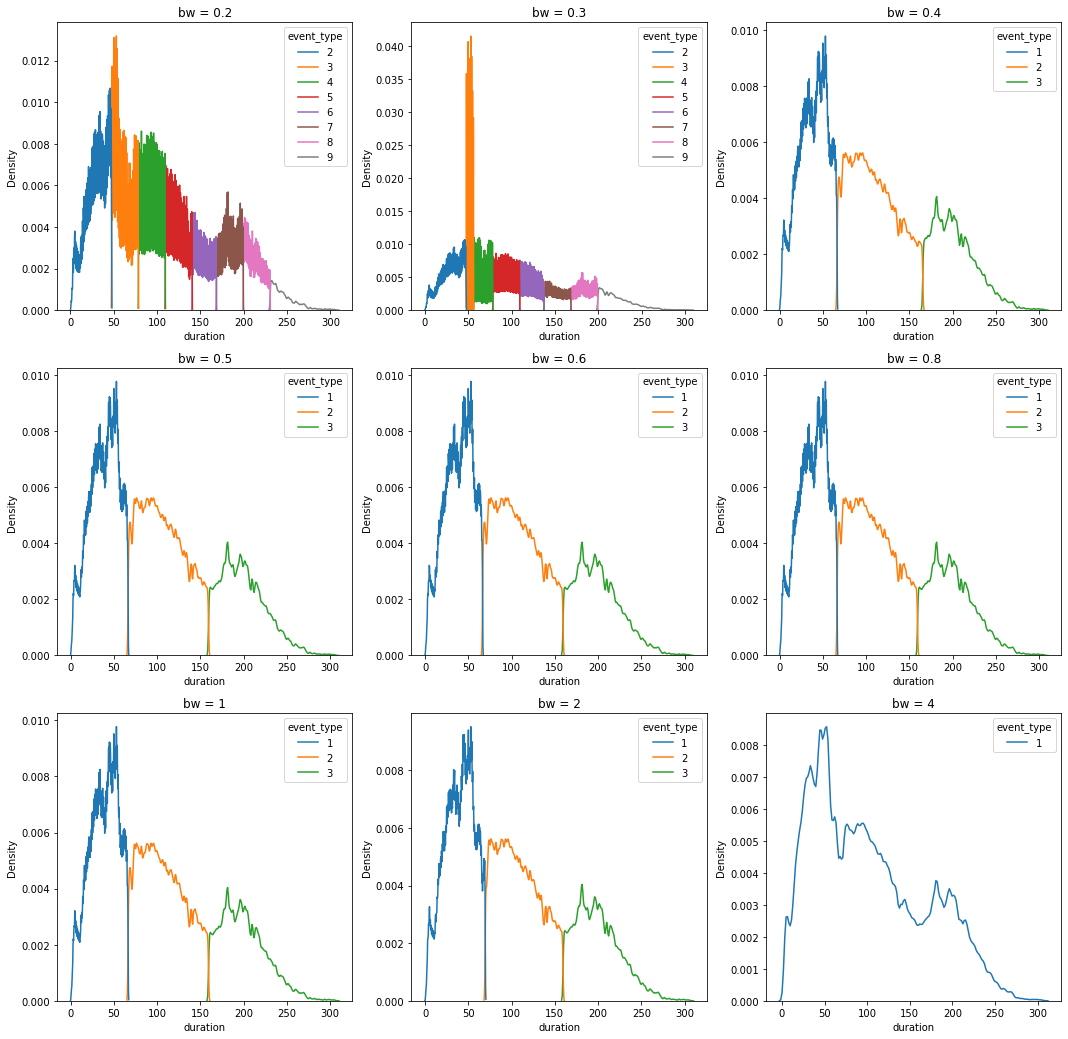

In [94]:
fig, ax = plt.subplots(3, 3, figsize=(18, 18))

db_scores = [] 
kh_scores = [] 
ari_3 = []
nmi_3=[]
ari_7=[]
nmi_7=[]
mask = y.event>0

for i in range(len(bws)-1):
    thresholds = time_grid[ranges[i]].flatten()
    labels = np.digitize(np.array(times.duration), bins=thresholds)
    y['event_type'] = 0
    y['event_type'][y.event!=0] = labels
    sns.kdeplot(data=y[y.event!=0], x="duration", hue="event_type", bw_adjust=0.25, palette="tab10",  ax=ax.flatten()[i])
    ax1=ax.flatten()[i]
    ax1.set_title(f'bw = {bws[i]}')
    if num_peaks[i] > 1:
        db_score = davies_bouldin_score(times, labels)
        kh_score = calinski_harabasz_score(times, labels)  
        ari_score_3 = adjusted_rand_score(y_true[mask]['event'], y[mask]['event_type'])
        nmi_score_3 = normalized_mutual_info_score(y_true[mask]['event'], y[mask]['event_type'])
        ari_score_7 = adjusted_rand_score(y_true_all[mask]['event'], y[mask]['event_type'])
        nmi_score_7 = normalized_mutual_info_score(y_true_all[mask]['event'], y[mask]['event_type'])

        db_scores.append(db_score)
        kh_scores.append(kh_score)
        ari_3.append(ari_score_3)
        nmi_3.append(nmi_score_3)
        ari_7.append(ari_score_7)
        nmi_7.append(nmi_score_7)

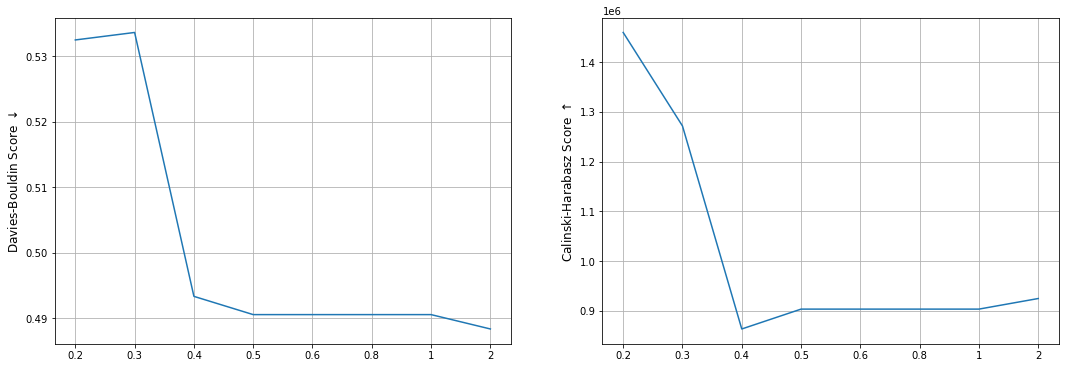

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(range(len(bws)-2), db_scores)
ax1.set_ylabel(r'Davies-Bouldin Score $\downarrow$', fontsize=12)
ax1.grid(True)
ax1.set_xticks(range(len(bws)-2), labels=bws[:-2])

ax2.plot(range(len(bws)-2), kh_scores)
ax2.set_ylabel(r'Calinski-Harabasz Score $\uparrow$', fontsize=12)
ax2.grid(True)
ax2.set_xticks(range(len(bws)-2), labels=bws[:-2])

plt.show()

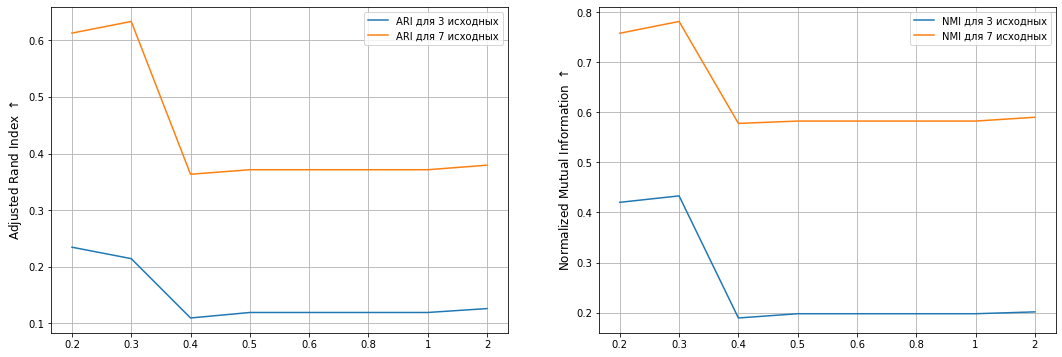

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

l1, = ax1.plot(range(len(bws)-2), ari_3, label='ARI для 3 исходных')
l2, = ax1.plot(range(len(bws)-2), ari_7, label='ARI для 7 исходных')
ax1.set_ylabel(r'Adjusted Rand Index $\uparrow$', fontsize=12)
ax1.grid(True)
ax1.set_xticks(range(len(bws)-2), labels=bws[:-2])
ax1.legend(handles=[l1, l2])

l1, = ax2.plot(range(len(bws)-2), nmi_3, label='NMI для 3 исходных')
l2, = ax2.plot(range(len(bws)-2), nmi_7, label='NMI для 7 исходных')
ax2.set_ylabel(r'Normalized Mutual Information $\uparrow$', fontsize=12)
ax2.grid(True)
ax2.set_xticks(range(len(bws)-2), labels=bws[:-2])
ax2.legend(handles=[l1, l2])


plt.show()

In [95]:
labels = np.digitize(np.array(times.duration), bins=time_grid[ranges[7]].flatten())
y['event_type'] = 0
y['event_type'][y.event!=0] = labels

In [96]:
from sklearn.metrics import f1_score, balanced_accuracy_score, classification_report, confusion_matrix

mask = y.event>0
print(f"f1 macro: {f1_score(y_true[mask]['event'], y[mask]['event_type'], average='macro')}")
print("balanced accuracy:", balanced_accuracy_score(y_true[mask]['event'], y[mask]['event_type']))

m = confusion_matrix(y_true[mask]['event'], y[mask]['event_type'])
print(m)

f1 macro: 0.40920292995793667
balanced accuracy: 0.4376920634920635
[[35000 35000 35000]
 [60984 44016     0]
 [    0 15381 19619]]


## UDMM (+ UniSplit)

https://github.com/pchasani/UDMM

In [97]:
from UDMM import *

In [99]:
t = np.array(times.duration).tolist()
cp_list = UniSplit(t, [])
cp_list

[3.0,
 4.0,
 10.0,
 12.5,
 15.5,
 17.5,
 20.0,
 161.0,
 166.5,
 168.5,
 172.0,
 173.0,
 175.0,
 176.5,
 179.5,
 190.0,
 192.5,
 194.5,
 210.5,
 212.0,
 212.5,
 219.5,
 233.5,
 255.5,
 277.5]

разбиение UniSplit

<Axes: xlabel='duration', ylabel='Density'>

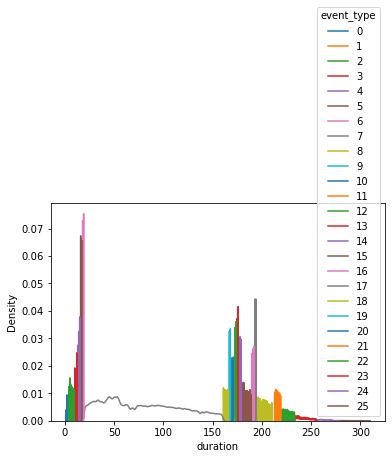

In [111]:
labels = np.digitize(np.array(times.duration), bins=cp_list)
y['event_type'] = 0
y['event_type'][y.event!=0] = labels
sns.kdeplot(data=y[y.event!=0], x="duration", hue="event_type", bw_adjust=0.25, palette="tab10")

если применить merge_unimodal_subsets (вызывается после UniSplit в UDMM):

In [211]:
t = np.array(times.duration)
cp_lst = merge_unimodal_subsets(t, cp_list)
component_ranges = sorted(cp_lst)

<Axes: xlabel='duration', ylabel='Density'>

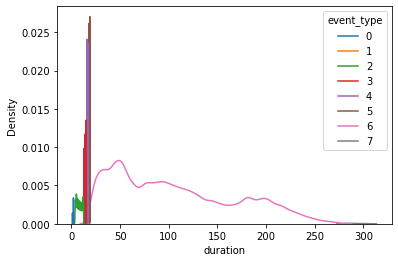

In [214]:
labels = np.digitize(t, bins=sorted(cp_lst))
y['event_type'] = 0
y['event_type'][y.event!=0] = labels
sns.kdeplot(data=y[y.event>0], x="duration", hue="event_type", bw_adjust=0.7, palette="tab10")

<Axes: xlabel='duration', ylabel='Density'>

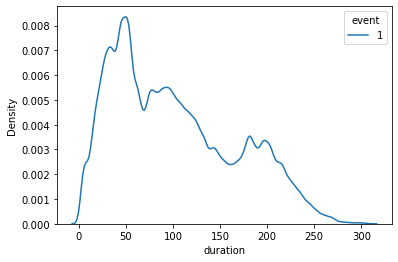

In [215]:
sns.kdeplot(data=y[y.event!=0], x="duration", hue="event", bw_adjust=0.5, palette="tab10")

<Axes: xlabel='duration', ylabel='Density'>

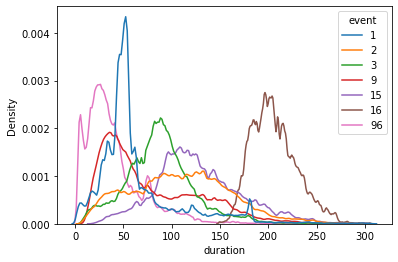

In [137]:
sns.kdeplot(data=y_true_all[y_true_all.event!=0], x="duration", hue="event", bw_adjust=0.25, palette="tab10")

метрики:

In [218]:
print(f'Davies Bouldin: {davies_bouldin_score(times, labels)}')
print(f'Calinski Harabazs: {calinski_harabasz_score(times, labels)}')  
print(f'ARI: {adjusted_rand_score(y_true_all[mask]["event"], y[mask]["event_type"])}')
print(f'NMI: {normalized_mutual_info_score(y_true_all[mask]["event"], y[mask]["event_type"])}')


Davies Bouldin: 0.4994260066980213
Calinski Harabazs: 11531.230314165276
ARI: 0.013441696388538133
NMI: 0.11177806286843955
